# Upgrading Scikit Learn Library

In [1]:
!pip install scikit-learn==1.5.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 50.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


# Importing Dependencies & Dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Data Collection

In [3]:
 # loading dataset to a pandas dataFrame
big_mart_data = pd.read_csv('/content/ML-Project-12-Big Mart Sales Prediction.csv')

# Exploratory Data Analysis

In [4]:
# first 5 rows in the dataset
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# last 5 rows in the dataset
big_mart_data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [6]:
# number of rows & columns
big_mart_data.shape

(8523, 12)

1 = Defective Heart

0 = Normal Heart

In [7]:
# getting info about the dataset
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
# checking null values
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
# getting the stats about dataset
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
# checking the values
big_mart_data['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [11]:
# checking the values
big_mart_data['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [12]:
# checking the values
big_mart_data['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [13]:
# checking the values
big_mart_data['Outlet_Establishment_Year'].value_counts()

Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64

In [14]:
	# checking the values
big_mart_data['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

<Axes: xlabel='Item_Identifier', ylabel='count'>

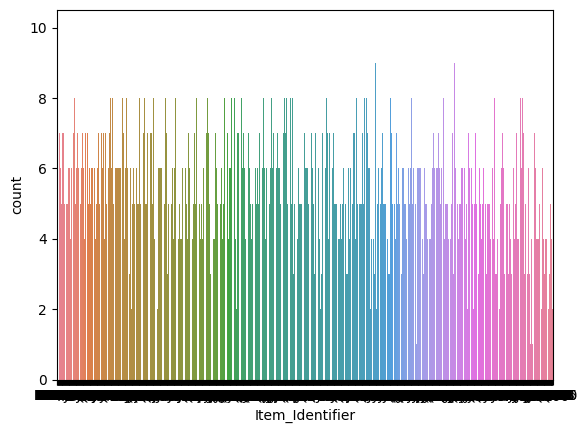

In [18]:
#count plot for Item_Identifier
sns.countplot(x='Item_Identifier',data=big_mart_data,hue='Item_Identifier')

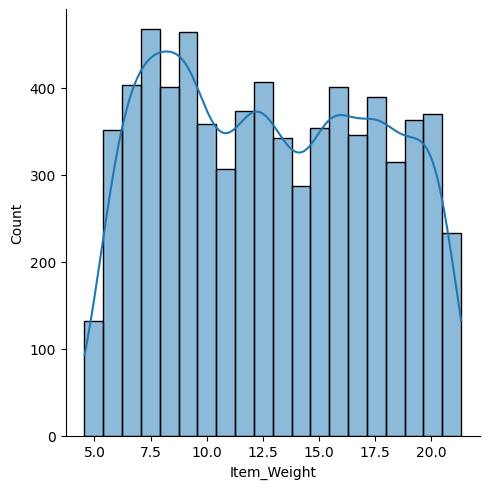

In [19]:
# distribution plot for Item_Weight
sns.displot(data=big_mart_data, x = 'Item_Weight', kde=True)

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

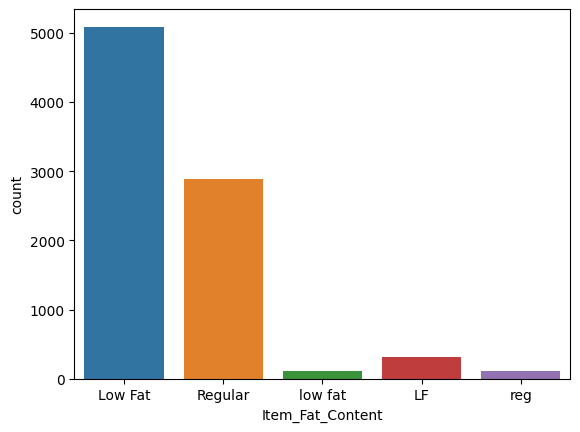

In [20]:
#count plot for Item_Fat_Content
sns.countplot(x='Item_Fat_Content',data=big_mart_data,hue='Item_Fat_Content')

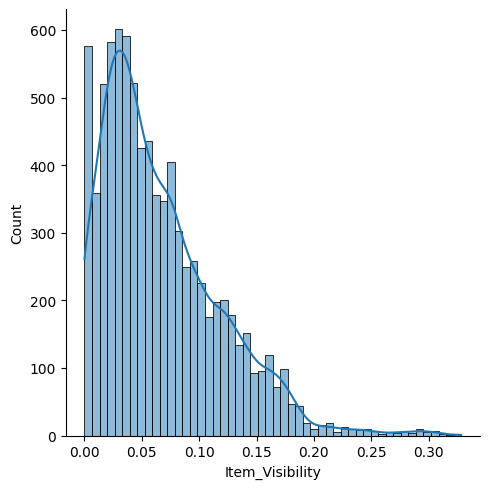

In [21]:
# distribution plot for Item_Visibility
sns.displot(data=big_mart_data, x = 'Item_Visibility', kde=True)

<Axes: xlabel='Item_Type', ylabel='count'>

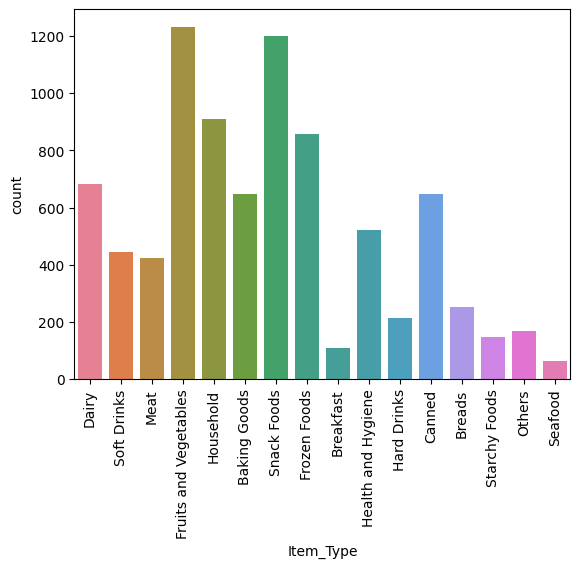

In [23]:
#writing x label at 180degreee
plt.xticks(rotation=90)
#count plot for Item_Type
sns.countplot(x='Item_Type',data=big_mart_data,hue='Item_Type')

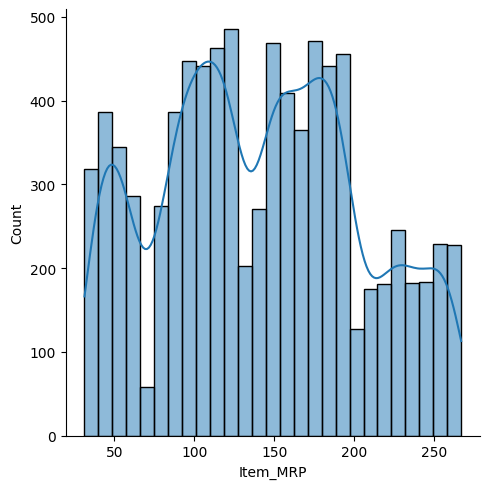

In [24]:
# distribution plot for Item_MRP
sns.displot(data=big_mart_data, x = 'Item_MRP', kde=True)

<Axes: xlabel='Outlet_Identifier', ylabel='count'>

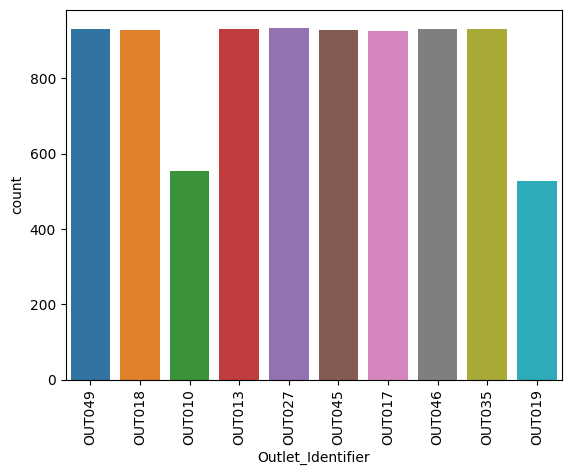

In [25]:
#writing x label at 180degreee
plt.xticks(rotation=90)
#count plot for Outlet_Identifier
sns.countplot(x='Outlet_Identifier',data=big_mart_data,hue='Outlet_Identifier')

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

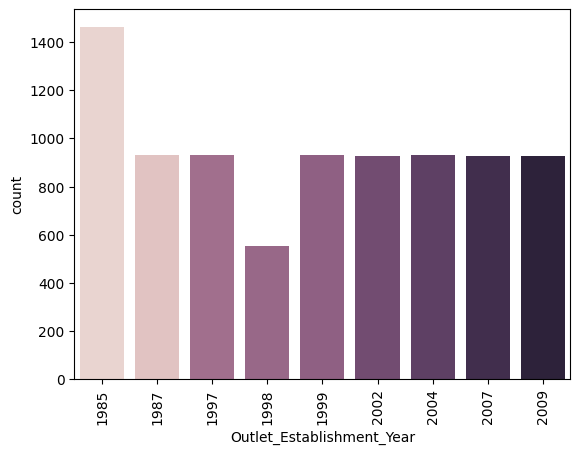

In [31]:
#writing x label at 180degreee
plt.xticks(rotation=90)
#count plot for Outlet_Establishment_Year
sns.countplot(x='Outlet_Establishment_Year',data=big_mart_data,hue='Outlet_Establishment_Year',legend=False)

<Axes: xlabel='Outlet_Size', ylabel='count'>

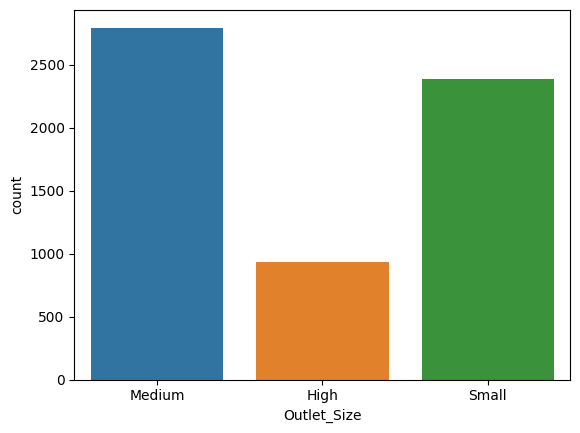

In [33]:
#count plot for Outlet_Size
sns.countplot(x='Outlet_Size',data=big_mart_data,hue='Outlet_Size',legend=False)

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

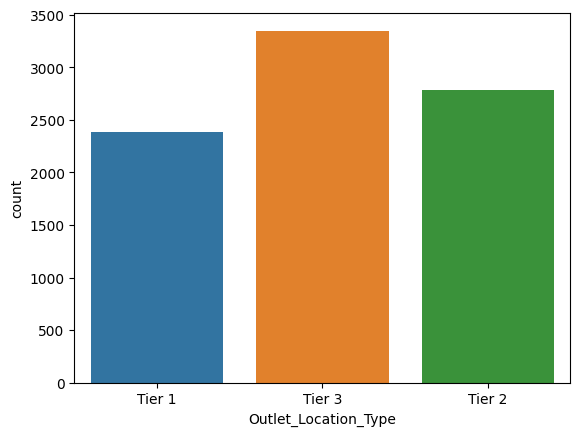

In [34]:
#count plot for Outlet_Location_Type
sns.countplot(x='Outlet_Location_Type',data=big_mart_data,hue='Outlet_Location_Type',legend=False)

<Axes: xlabel='Outlet_Type', ylabel='count'>

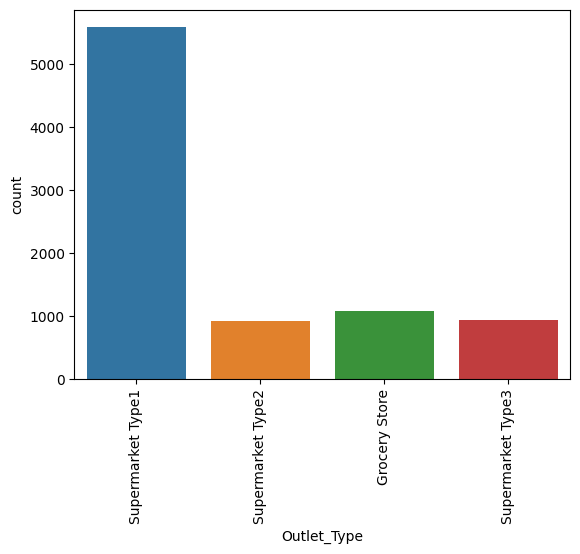

In [36]:
#writing x label at 180degreee
plt.xticks(rotation=90)
#count plot for Outlet_Type
sns.countplot(x='Outlet_Type',data=big_mart_data,hue='Outlet_Type',legend=False)

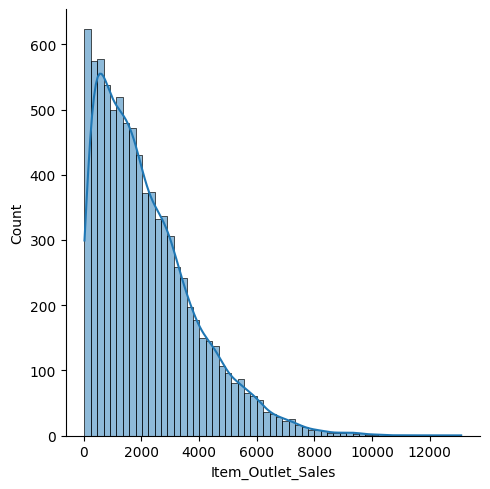

In [37]:
# distribution plot for Item_Outlet_Sales
sns.displot(data=big_mart_data, x = 'Item_Outlet_Sales', kde=True)

In [42]:
#setting the figure parameters
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['figure.dpi'] = 200

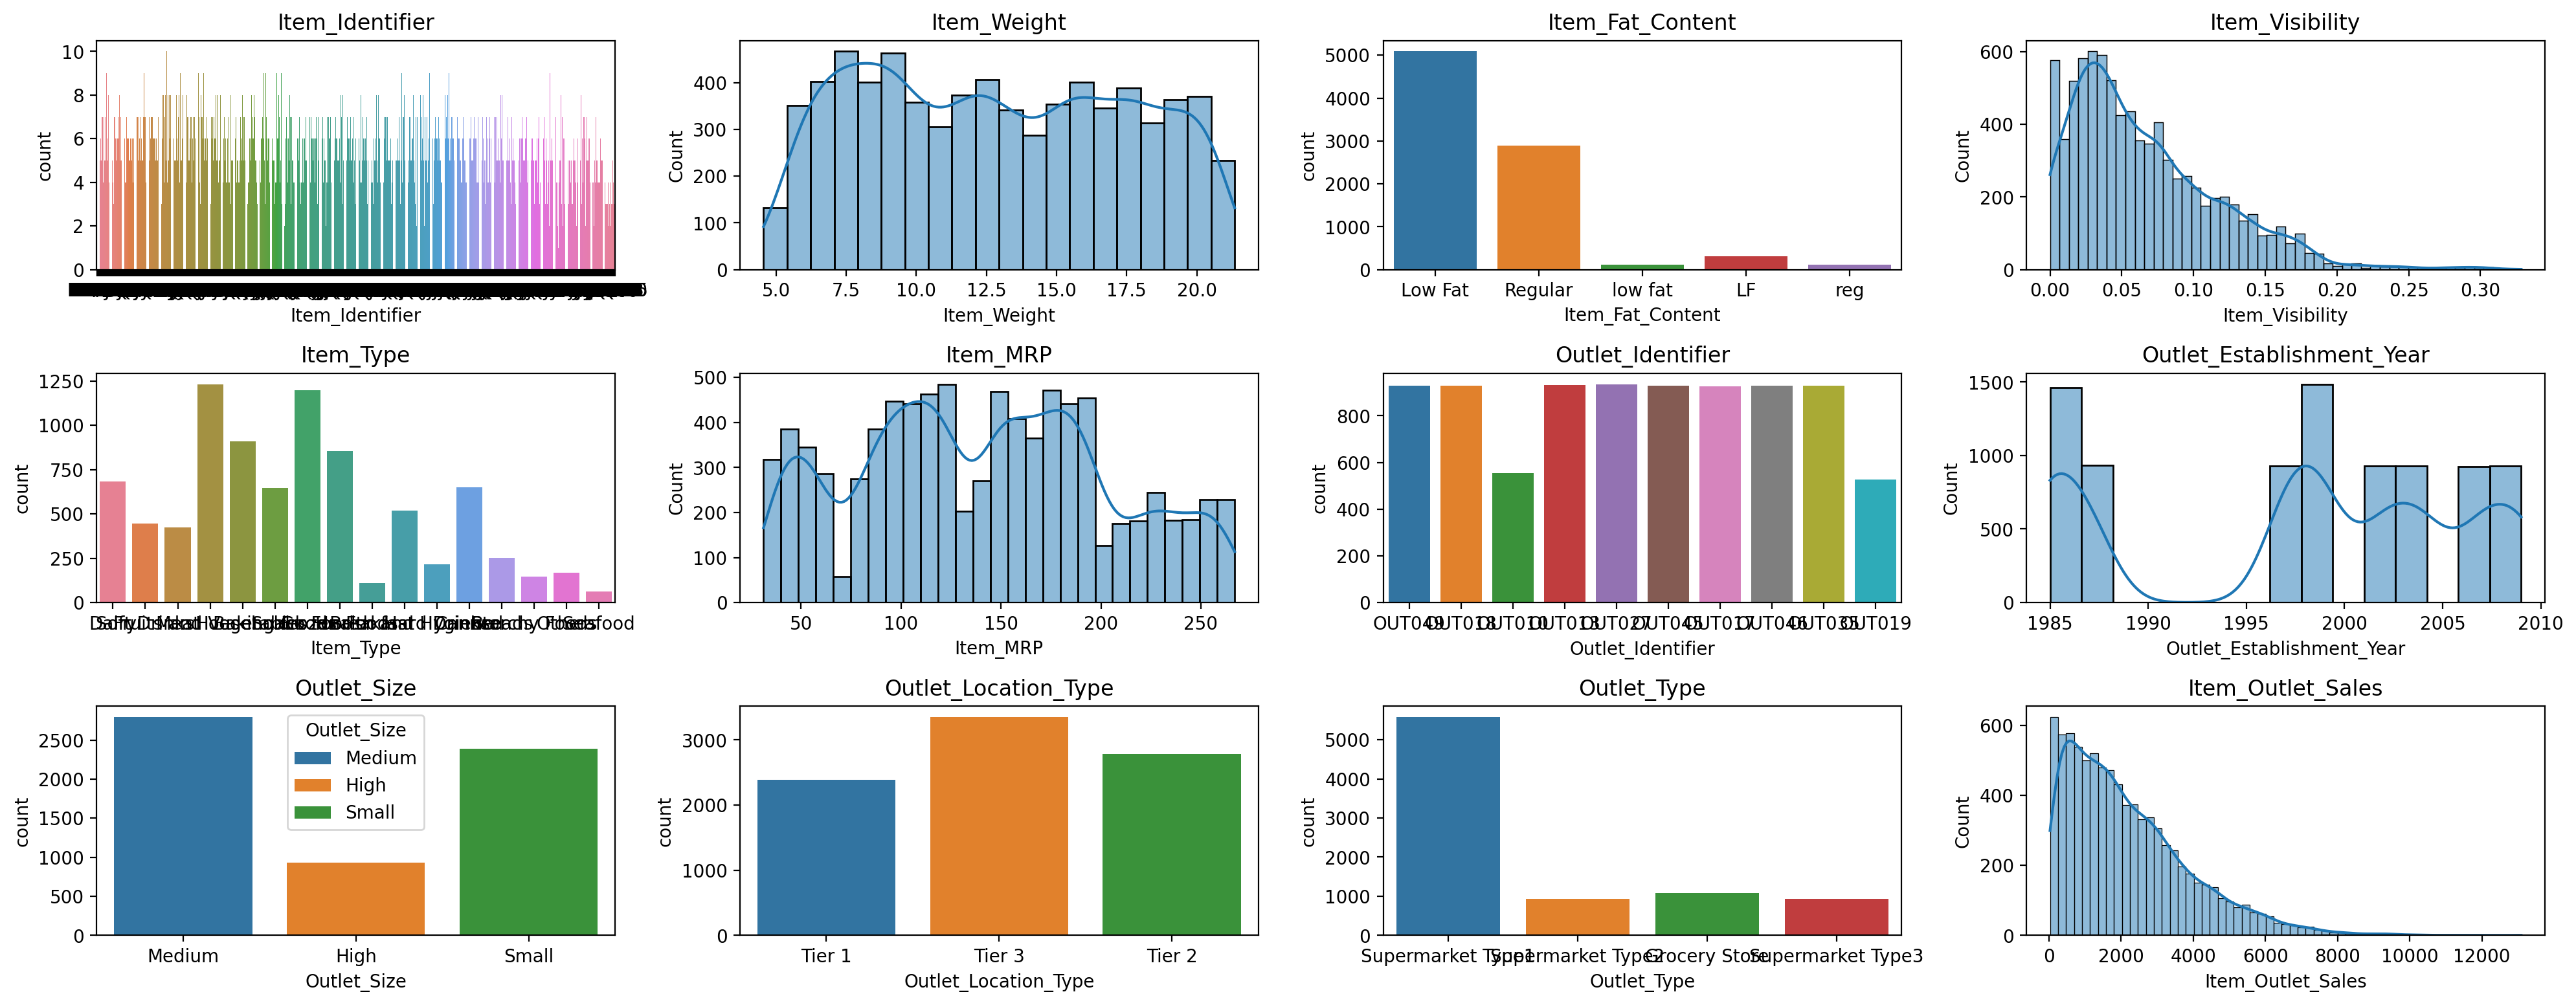

In [44]:
#plotting the histplot for each column in dataset using subplots
columns = big_mart_data.columns
cat_cols = []
for i, col in enumerate(columns):
    plt.subplot(4,4, i+1)
    if big_mart_data[col].dtype == 'object':
      cat_cols.append(col)
      sns.countplot(x=col, data=big_mart_data,hue=col)
    else:
      sns.histplot(x=col, data=big_mart_data,kde=True)
    plt.xlabel(col)
    plt.title("{}".format(col))
    plt.tight_layout()

In [46]:
cat_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

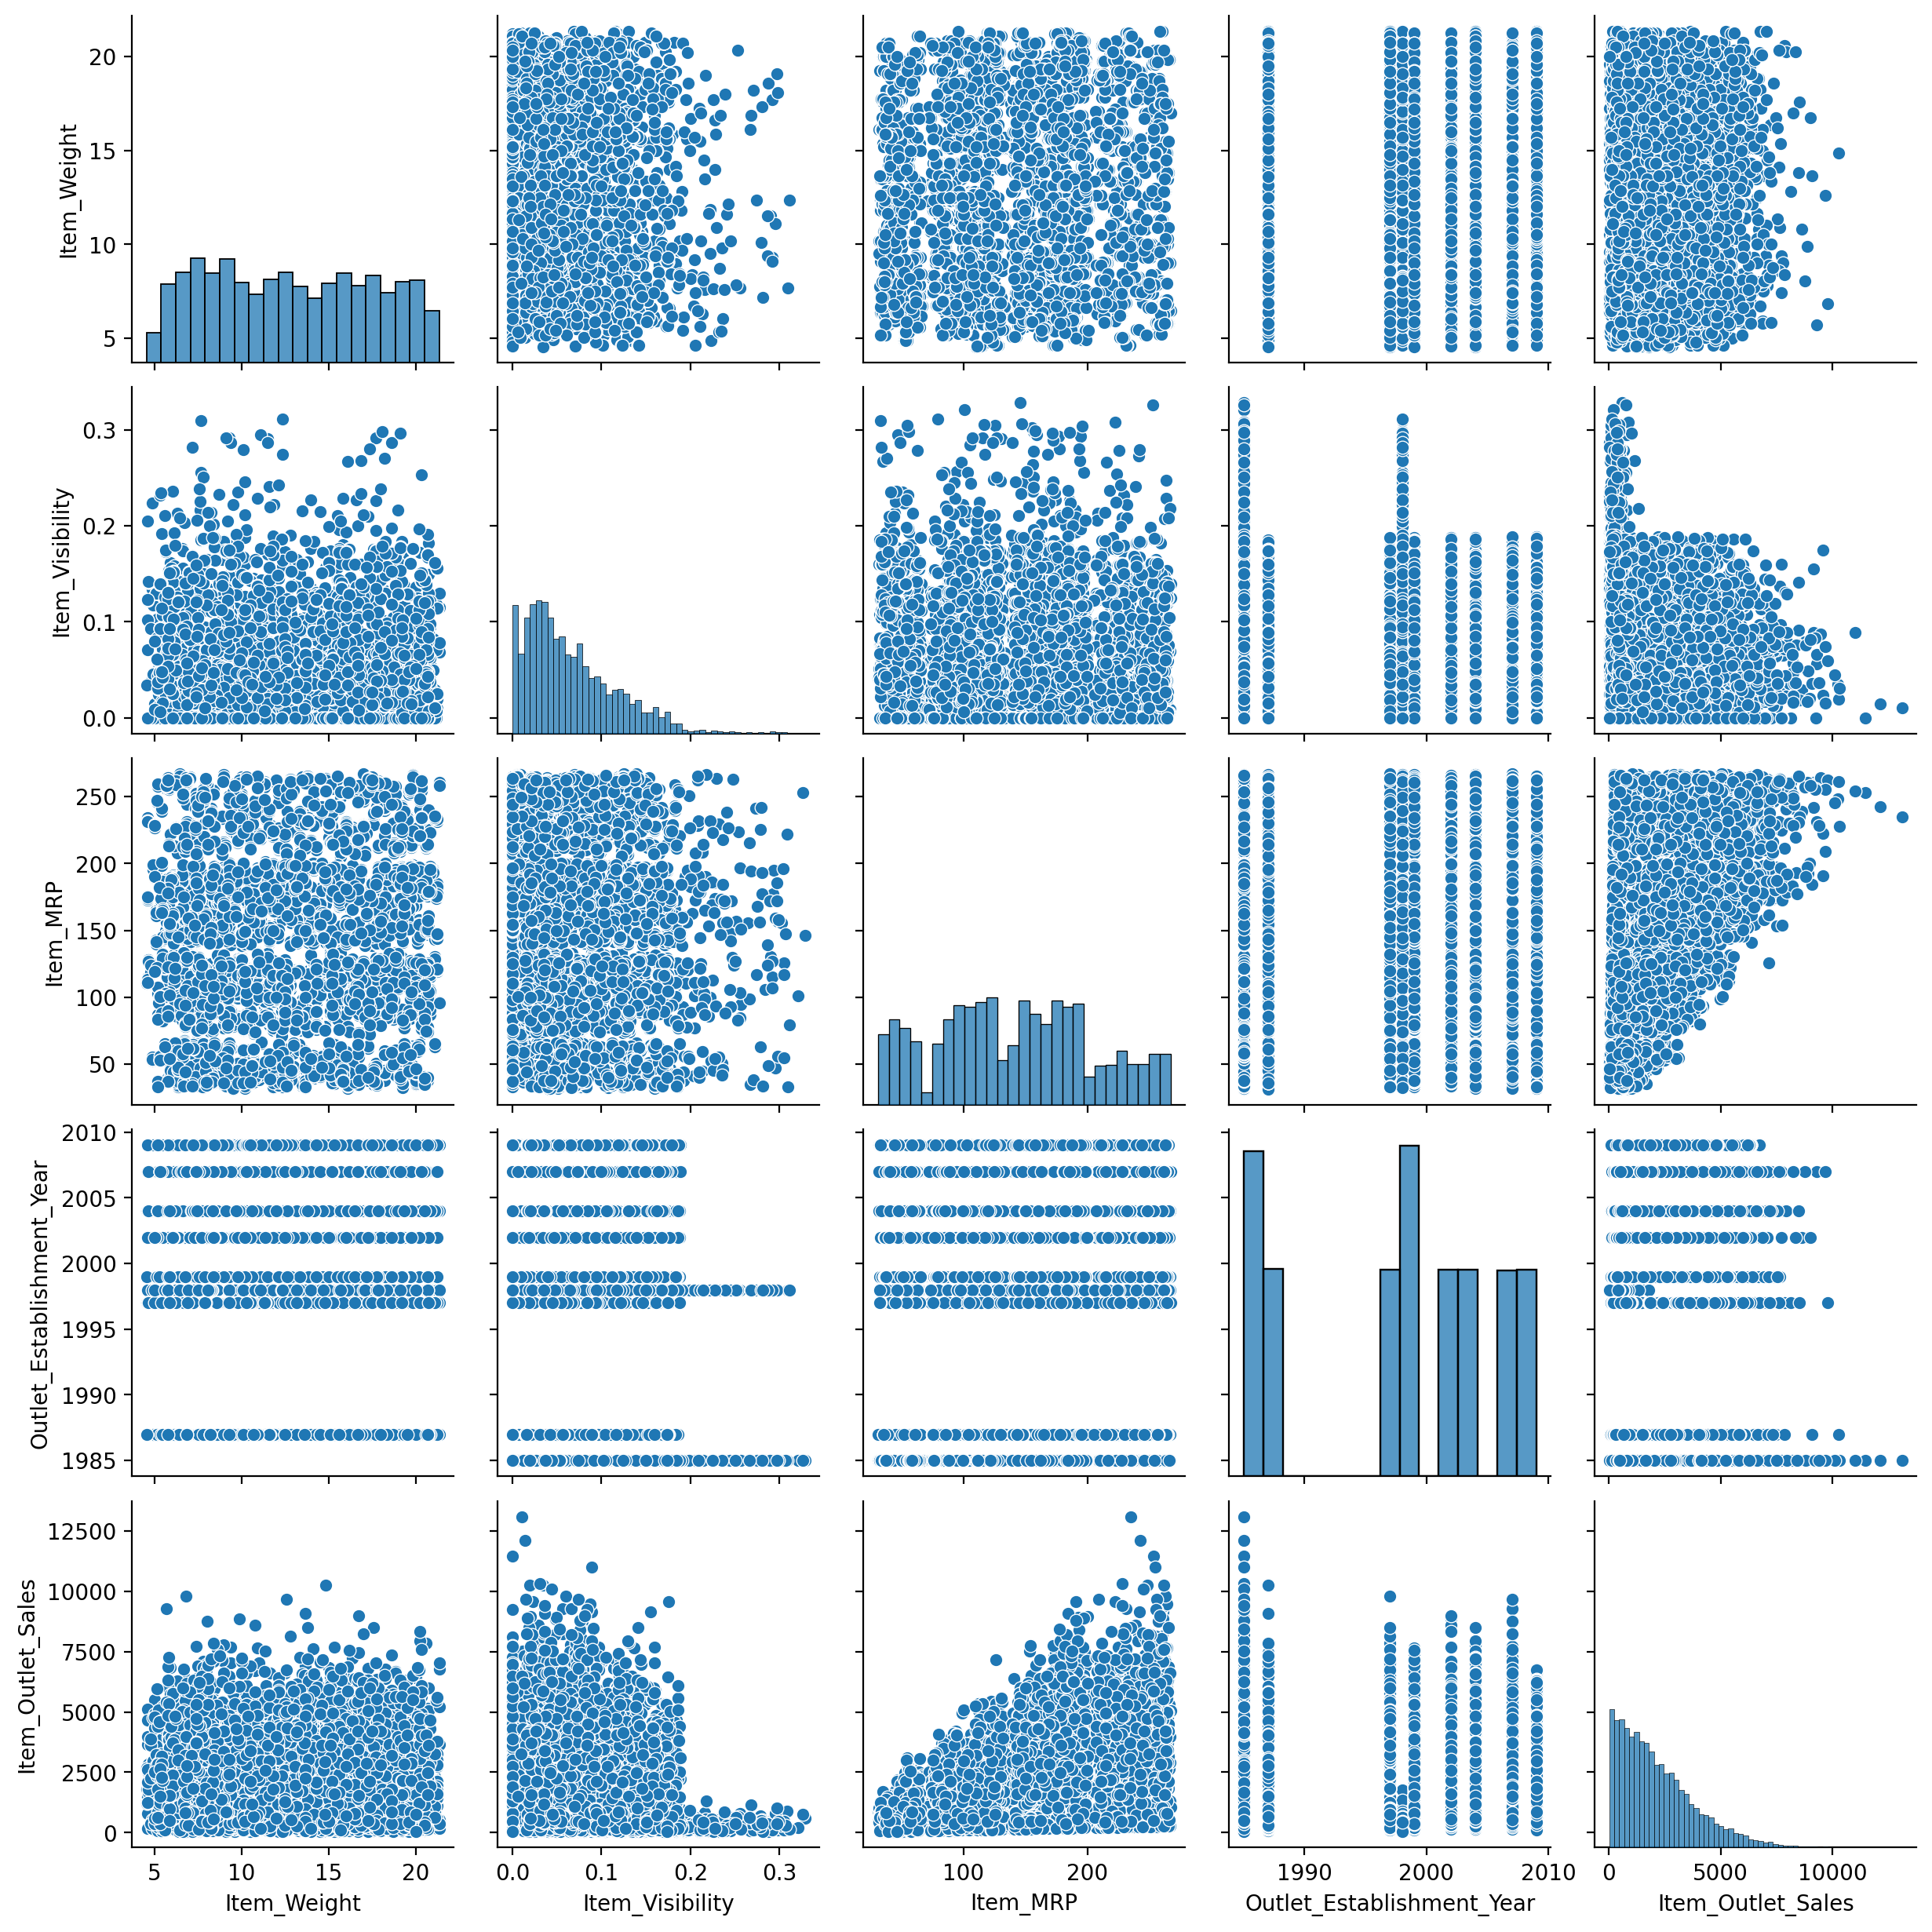

In [45]:
#pair plot
sns.pairplot(big_mart_data)

# Data Preprocessing & Splitting

In [47]:
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [48]:
big_mart_data.replace({'Item_Fat_Content':{'low fat':'Low Fat','reg':'Regular','LF':'Low Fat'}},inplace=True)

In [49]:
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [58]:
def handling_missing_val(Item_Type,big_mart_data):
  for i in Item_Type:
    big_mart_data[big_mart_data['Item_Type']==i]['Item_Weight'].fillna(big_mart_data[big_mart_data['Item_Type']==i]['Item_Weight'].mean(),inplace=True)



In [76]:
for i in big_mart_data['Item_Type'].unique():
    imean = big_mart_data.loc[big_mart_data['Item_Type'] == i, 'Item_Weight'].mean()
    big_mart_data.loc[big_mart_data['Item_Type'] == i, 'Item_Weight'] = big_mart_data.loc[big_mart_data['Item_Type'] == i, 'Item_Weight'].fillna(imean)

In [77]:
# checking null values
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

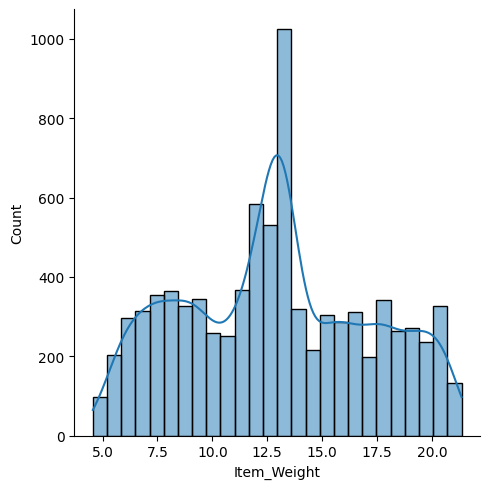

In [79]:
# distribution plot for Item_Weight
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['figure.dpi'] = 100
sns.displot(data=big_mart_data, x = 'Item_Weight', kde=True)

In [ ]:
# Dropping the columns
big_mart_data.drop(columns=['Item_Identifier','Outlet_Identifier','Outlet_Size',], inplace=True)

In [95]:
cat_cols.remove('Item_Identifier')
cat_cols.remove('Outlet_Identifier')
cat_cols.remove('Outlet_Size')

In [84]:
# checking null values
big_mart_data.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Splitting the Data

In [85]:
# seperating the data and labels
X = big_mart_data.drop(columns = 'Item_Outlet_Sales', axis = 1)
y = big_mart_data['Item_Outlet_Sales']

In [86]:
#importing the train_test_split to split the data
from sklearn.model_selection import train_test_split

In [88]:
# spliting the data in training & testing data
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [89]:
print(X.shape, X_train.shape , X_test.shape)

(8523, 8) (6818, 8) (1705, 8)


In [90]:
# saving the all columns of training data
all_columns = X_train.columns

One-Hot Encoding

In [91]:
#importing OneHotEncoder for preprocessing
from sklearn.preprocessing import OneHotEncoder

In [92]:
#loading the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [96]:
#fitting the categorical columns to encoder
X_train_encoded = encoder.fit_transform(X_train[cat_cols])

In [97]:
#storing the encoding columns
encoded_columns = encoder.get_feature_names_out(cat_cols)

In [98]:
# Create a DataFrame with the encoded features
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_columns)

In [99]:
# Add the remaining non-categorical columns
X_train_final_encoded = pd.concat([X_train.drop(cat_cols, axis=1).reset_index(drop=True), X_train_encoded_df], axis=1)

In [100]:
X_train_final_encoded.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.500,0.035206,171.3448,1999,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,18.000,0.047473,170.5422,2002,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,17.600,0.076122,111.7202,1997,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,8.325,0.029845,41.6138,2002,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,12.850,0.137228,155.5630,1997,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [101]:
#checking is there any loss of data
X_train_final_encoded.isnull().sum()

Item_Weight                        0
Item_Visibility                    0
Item_MRP                           0
Outlet_Establishment_Year          0
Item_Fat_Content_Low Fat           0
Item_Fat_Content_Regular           0
Item_Type_Baking Goods             0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Location_Type_Tier 1        0
Outlet_Location_Type_Tier 2        0
Outlet_Location_Type_Tier 3        0
Outlet_Type_Grocery Store          0
Outlet_Type_Supermarket Type1      0
O

Standardizing the Data

In [102]:
# importing the Standard Scaler to standardize the data
from sklearn.preprocessing import StandardScaler

In [103]:
# saving the all columns of training data
training_columns = X_train_final_encoded.columns

In [104]:
#scaling the training data
scaler = StandardScaler()
X_train_encoded = scaler.fit_transform(X_train_final_encoded)

In [105]:
print(X_train_encoded)

[[-0.79948925 -0.60070308  0.47070929 ...  0.73041993 -0.35209326
  -0.35445699]
 [ 1.20895471 -0.36215854  0.45787656 ...  0.73041993 -0.35209326
  -0.35445699]
 [ 1.1144397   0.19493285 -0.48262534 ...  0.73041993 -0.35209326
  -0.35445699]
 ...
 [ 1.1144397  -0.91693149  1.52620691 ...  0.73041993 -0.35209326
  -0.35445699]
 [ 1.76423039 -0.22818684 -0.38307175 ...  0.73041993 -0.35209326
  -0.35445699]
 [ 0.81908029 -0.95485942 -0.73811593 ...  0.73041993 -0.35209326
  -0.35445699]]


In [106]:
# Create a DataFrame with the encoded features
X_train_encoded_scaled = pd.DataFrame(X_train_encoded, columns=training_columns)

In [107]:
X_train_encoded_scaled.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.799489,-0.600703,0.470709,0.136169,-1.344216,1.344216,-0.284039,-0.169311,-0.113026,-0.285244,...,-0.407515,-0.234019,-0.138322,1.623061,-0.699265,-0.810472,-0.379673,0.73042,-0.352093,-0.354457
1,1.208955,-0.362159,0.457877,0.493521,0.743928,-0.743928,-0.284039,-0.169311,-0.113026,-0.285244,...,-0.407515,-0.234019,-0.138322,-0.616120,1.430073,-0.810472,-0.379673,0.73042,-0.352093,-0.354457
2,1.114440,0.194933,-0.482625,-0.102066,-1.344216,1.344216,-0.284039,-0.169311,-0.113026,-0.285244,...,-0.407515,-0.234019,-0.138322,1.623061,-0.699265,-0.810472,-0.379673,0.73042,-0.352093,-0.354457
3,-1.077127,-0.704944,-1.603553,0.493521,0.743928,-0.743928,-0.284039,-0.169311,-0.113026,-0.285244,...,-0.407515,-0.234019,-0.138322,-0.616120,1.430073,-0.810472,-0.379673,0.73042,-0.352093,-0.354457
4,-0.007926,1.383177,0.218375,-0.102066,0.743928,-0.743928,-0.284039,-0.169311,-0.113026,-0.285244,...,2.453900,-0.234019,-0.138322,1.623061,-0.699265,-0.810472,-0.379673,0.73042,-0.352093,-0.354457


In [108]:
#checking the number of rows and columns
X_train_encoded_scaled.shape

(6818, 29)

# Model Selection

Comparing the models with default hyperparameter values using Cross Validation

In [109]:
# importing the standard classification models from sklearn library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [110]:
# all models in a dictionary
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVM': SVR(),
    'KNN': KNeighborsRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'XGBoost': XGBRegressor()
}

In [111]:
# importing cross validation score function to calculate the cross validation score
from sklearn.model_selection import cross_val_score

In [112]:
# defining a function who can give you cross validation scores on given data with given set of model
def compare_models_cross_validation(models,X,y):
  for name, model in models.items():
    cv_score = cross_val_score(model, X, y, cv=5,scoring='r2')
    mean_r2 = cv_score.mean()
    print(f"Model: {name}")
    print('Cross Validation accuracies for the',model,'=', cv_score)
    print('Mean R square score of the ',model,'=',mean_r2)
    print("="*50)

In [113]:
# calling the compare function for the models we choose
compare_models_cross_validation(models,X_train_encoded_scaled,y_train)

Model: Linear Regression
Cross Validation accuracies for the LinearRegression() = [0.55568778 0.55623255 0.55279449 0.56085722 0.54328207]
Mean R square score of the  LinearRegression() = 0.5537708222983153
Model: Ridge
Cross Validation accuracies for the Ridge() = [0.55567777 0.55621226 0.5527785  0.56053461 0.54328399]
Mean R square score of the  Ridge() = 0.5536974227499164
Model: Lasso
Cross Validation accuracies for the Lasso() = [0.55614935 0.55657966 0.55318719 0.56069684 0.54340519]
Mean R square score of the  Lasso() = 0.5540036461811575
Model: SVM
Cross Validation accuracies for the SVR() = [-0.00255672  0.00242485 -0.01371482 -0.01869145 -0.03188788]
Mean R square score of the  SVR() = -0.012885205776648135
Model: KNN
Cross Validation accuracies for the KNeighborsRegressor() = [0.46897288 0.49164285 0.45496839 0.47504963 0.43835063]
Mean R square score of the  KNeighborsRegressor() = 0.4657968756028036
Model: RandomForestRegressor
Cross Validation accuracies for the RandomFo

Top 3:

Lasso() = 0.5540036461811575

LinearRegression() = 0.5537708222983153

XGBRegressor() = 0.5035426094401404

#Feature Selection

In [114]:
#importing the RFE
from sklearn.feature_selection import RFE

In [115]:
# defining a function who will give you n best features for the given model and data
def find_best_feature(n,mdl,X,y):
    model = mdl
    rfe = RFE(model, n_features_to_select=n, verbose=0)
    rfe = rfe.fit(X, y)
    selected_col = X.columns[rfe.support_]
    cv_score = cross_val_score(model,X[selected_col],y, cv=5,scoring='r2')
    mean_r2 = cv_score.mean()
    print("Selected columns: ", list(selected_col))
    print(n, mean_r2)
    print("----------------------\n")
    return list(selected_col),mean_r2

# 1. Lasso Model

Lasso Model as the highest r2 based on cross validation score according to its default hyperparameters

Lasso() = 0.5540036461811575

In [116]:
# loading the Lasso Model
ls = Lasso()

In [117]:
# getting the best features of Lasso Model by calling the feature selection function
best_score_ls = 0
best_features_ls = None
for i in range(X_train_encoded_scaled.shape[1]):
    col , score = find_best_feature(i+1,ls,X_train_encoded_scaled,y_train)
    if best_score_ls < score:
        best_score_ls = score
        best_features_ls = col
print(best_features_ls)
print(best_score_ls)

Selected columns:  ['Item_MRP']
1 0.3188400090272434
----------------------

Selected columns:  ['Item_MRP', 'Outlet_Type_Grocery Store']
2 0.48513449050264545
----------------------

Selected columns:  ['Item_MRP', 'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type3']
3 0.5530992659381155
----------------------

Selected columns:  ['Item_MRP', 'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']
4 0.5566176808459508
----------------------

Selected columns:  ['Item_MRP', 'Item_Type_Dairy', 'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']
5 0.5566760129824175
----------------------

Selected columns:  ['Item_MRP', 'Item_Fat_Content_Low Fat', 'Item_Type_Dairy', 'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']
6 0.5565118052588915
----------------------

Selected columns:  ['Item_Visibility', 'Item_MRP', 'Item_Fat_Content_Low Fat', 'Item_Type_Dairy

Best Features : ['Item_MRP', 'Item_Type_Dairy', 'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']

Best Score : 0.5566760129824175

In [118]:
# using a diffferent df to store
X_train_best_features_ls = X_train_encoded_scaled[best_features_ls]

In [119]:
# getting the cross val score of ls with its best features
cv_score_ls = cross_val_score(ls, X_train_best_features_ls, y_train, cv=5,scoring='r2')
print(cv_score_ls)
print(cv_score_ls.mean())

[0.55924932 0.56171237 0.55660003 0.56220388 0.54361445]
0.5566760129824175


In [120]:
# fitting the default model with its best features
ls.fit(X_train_best_features_ls,y_train)

Lasso()

Test Data Preprocessing

In [121]:
#fitting the categorical columns to encoder
X_test_encoded = encoder.transform(X_test[cat_cols])

In [122]:
# Create a DataFrame with the encoded features
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_columns)

In [123]:
# Add the remaining non-categorical columns
X_test_final_encoded = pd.concat([X_test.drop(cat_cols, axis=1).reset_index(drop=True), X_test_encoded_df], axis=1)

In [124]:
X_test_final_encoded.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,14.30000,0.026300,79.4302,1987,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,7.93000,0.071136,42.7086,1997,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.50000,0.041313,42.0454,1999,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,11.84746,0.044767,173.7054,1985,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,10.19500,0.012456,197.5110,2004,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [125]:
#scaling the training data
X_test_scaled = scaler.transform(X_test_final_encoded)

In [126]:
X_test_encoded_scaled = pd.DataFrame(X_test_scaled, columns=training_columns)

In [127]:
X_test_encoded_scaled.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.334691,-0.773887,-0.998908,-1.293240,0.743928,-0.743928,-0.284039,-0.169311,-0.113026,-0.285244,...,-0.407515,-0.234019,-0.138322,-0.616120,-0.699265,1.233849,-0.379673,0.730420,-0.352093,-0.354457
1,-1.170461,0.097978,-1.586048,-0.102066,0.743928,-0.743928,-0.284039,-0.169311,-0.113026,-0.285244,...,-0.407515,-0.234019,-0.138322,1.623061,-0.699265,-0.810472,-0.379673,0.730420,-0.352093,-0.354457
2,0.381948,-0.481942,-1.596652,0.136169,-1.344216,1.344216,-0.284039,-0.169311,-0.113026,3.505774,...,-0.407515,-0.234019,-0.138322,1.623061,-0.699265,-0.810472,-0.379673,0.730420,-0.352093,-0.354457
3,-0.244814,-0.414780,0.508453,-1.531475,-1.344216,1.344216,-0.284039,-0.169311,-0.113026,-0.285244,...,-0.407515,4.273159,-0.138322,-0.616120,-0.699265,1.233849,-0.379673,-1.369075,-0.352093,2.821217
4,-0.635269,-1.043092,0.889079,0.731756,-1.344216,1.344216,-0.284039,-0.169311,-0.113026,-0.285244,...,-0.407515,-0.234019,-0.138322,-0.616120,1.430073,-0.810472,-0.379673,0.730420,-0.352093,-0.354457


In [128]:
#checking the number of rows and columns
X_test_encoded_scaled.shape

(1705, 29)

In [129]:
# taking only best features of ls to test data
X_test_best_features_ls = X_test_encoded_scaled[best_features_ls]

In [130]:
# listing best features
best_features_ls

['Item_MRP',
 'Item_Type_Dairy',
 'Outlet_Type_Grocery Store',
 'Outlet_Type_Supermarket Type2',
 'Outlet_Type_Supermarket Type3']

In [131]:
# predicting the labels on test data
y_predict_ls = ls.predict(X_test_best_features_ls)

In [132]:
#importing mae,mse,rmse,r2 for evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error, r2_score

In [135]:
# calcuation the mae , mse , rmse , r2
mae_ls = mean_absolute_error(y_test, y_predict_ls)
mse_ls = mean_squared_error(y_test, y_predict_ls)
rmse_ls = root_mean_squared_error(y_test, y_predict_ls)
r2_ls = r2_score(y_test, y_predict_ls)

In [136]:
print("Mean Absolute Error (MAE):", mae_ls)
print("Mean Squared Error (MSE):",mse_ls)
print("Root Mean Squared Error (RMSE):" ,rmse_ls)
print("R-squared (R2):", r2_ls)

Mean Absolute Error (MAE): 791.3656053344254
Mean Squared Error (MSE): 1144385.3831547417
Root Mean Squared Error (RMSE): 1069.7594978100178
R-squared (R2): 0.578955854882077


# Hyperparameter Tuning : Lasso Model

In [137]:
# importing gridsearchcv to check the best hyperparameters
from sklearn.model_selection import GridSearchCV

In [138]:
# parameters for XG Boost Classifier
param_ls = {
    'alpha': np.logspace(-4, 4, 50)  # Testing alphas from 1e-4 to 1e+4
}

In [140]:
grid_ls = GridSearchCV(estimator=ls, param_grid=param_ls, cv=5, n_jobs=-1)
grid_ls.fit(X_train_best_features_ls, y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-02, 8.68511...
       8.28642773e-01, 1.20679264e+00, 1.75751062e+00, 2.55954792e+00,
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04])})

In [141]:
# getting the best hyperparameters
print(grid_ls.best_estimator_, grid_ls.best_params_, grid_ls.best_score_)

Lasso(alpha=0.05963623316594643) {'alpha': 0.05963623316594643} 0.5566774887430913


In [142]:
# testing grid_ls model on test data
y_predict_grid_ls = grid_ls.predict(X_test_best_features_ls)

In [143]:
# calcuation the mae , mse , rmse , r2
mae_grid_ls = mean_absolute_error(y_test, y_predict_grid_ls)
mse_grid_ls = mean_squared_error(y_test, y_predict_grid_ls)
rmse_grid_ls = root_mean_squared_error(y_test, y_predict_grid_ls)
r2_grid_ls = r2_score(y_test, y_predict_grid_ls)

print("Mean Absolute Error (MAE):", mae_grid_ls)
print("Mean Squared Error (MSE):",mse_grid_ls)
print("Root Mean Squared Error (RMSE):" ,rmse_grid_ls)
print("R-squared (R2):", r2_grid_ls)

Mean Absolute Error (MAE): 791.496535042599
Mean Squared Error (MSE): 1144621.929533785
Root Mean Squared Error (RMSE): 1069.870052639004
R-squared (R2): 0.5788688243507447


Best Parameters : {'alpha': 0.05963623316594643}

# Final Model : Lasso Model

In [144]:
# loading the model with best hyper parameter
model1 = Lasso(alpha=0.05963623316594643)

In [145]:
# fitting the training data with best features of ls
model1.fit(X_train_best_features_ls,y_train)

Lasso(alpha=0.05963623316594643)

# Model Evaluation : Lasso Model

In [146]:
# predicting the train data
y_predict_train_model1 = model1.predict(X_train_best_features_ls)

In [147]:
# calcuation the mae , mse , rmse , r2
mae_train_model1 = mean_absolute_error(y_train, y_predict_train_model1)
mse_train_model1 = mean_squared_error(y_train, y_predict_train_model1)
rmse_train_model1 = root_mean_squared_error(y_train, y_predict_train_model1)
r2_train_model1 = r2_score(y_train, y_predict_train_model1)

In [148]:
print("Model1 on Training Data:")
print("Mean Absolute Error (MAE):", mae_train_model1)
print("Mean Squared Error (MSE):",mse_train_model1)
print("Root Mean Squared Error (RMSE):" ,rmse_train_model1)
print("R-squared (R2):", r2_train_model1)

Model1 on Training Data:
Mean Absolute Error (MAE): 848.0305931257507
Mean Squared Error (MSE): 1308147.216756467
Root Mean Squared Error (RMSE): 1143.7426357168238
R-squared (R2): 0.5577670720794723


In [149]:
# predicting the test data
y_predict_test_model1 = model1.predict(X_test_best_features_ls)

In [150]:
# calcuation the mae , mse , rmse , r2
mae_test_model1 = mean_absolute_error(y_test, y_predict_test_model1)
mse_test_model1 = mean_squared_error(y_test, y_predict_test_model1)
rmse_test_model1 = root_mean_squared_error(y_test, y_predict_test_model1)
r2_test_model1 = r2_score(y_test, y_predict_test_model1)

In [151]:
print("Model1 on Test Data:")
print("Mean Absolute Error (MAE):", mae_test_model1)
print("Mean Squared Error (MSE):",mse_test_model1)
print("Root Mean Squared Error (RMSE):" ,rmse_test_model1)
print("R-squared (R2):", r2_test_model1)

Model1 on Test Data:
Mean Absolute Error (MAE): 791.496535042599
Mean Squared Error (MSE): 1144621.929533785
Root Mean Squared Error (RMSE): 1069.870052639004
R-squared (R2): 0.5788688243507447


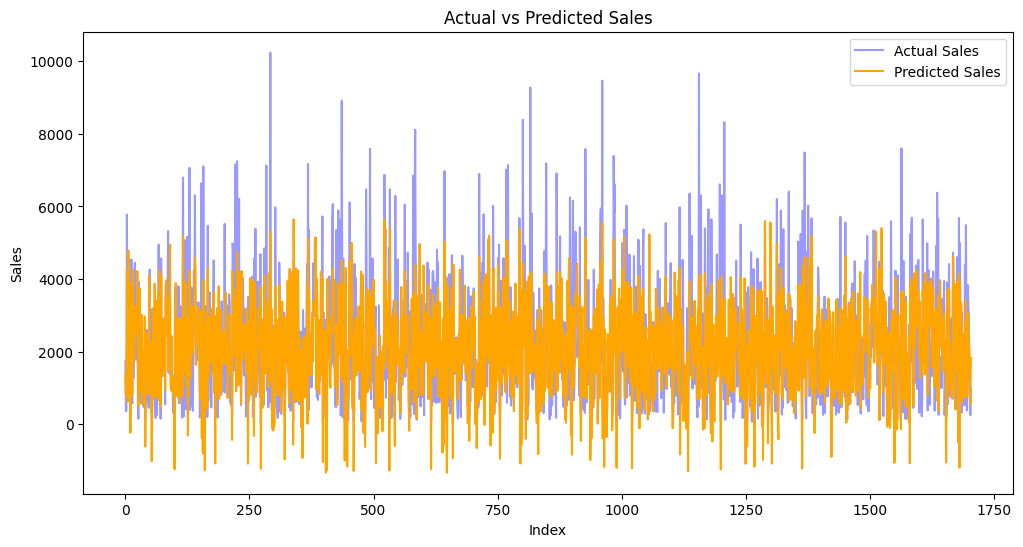

In [153]:
#graphical analysis of actual price and predicted price with different colors for actual and predicted price

indices = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(indices, y_test, color='blue', label='Actual Sales',alpha=0.4)
plt.plot(indices, y_predict_test_model1, color='orange', label='Predicted Sales')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

# 2. LinearRegression Model

LinearRegression Model as the 2nd highest r2 based on cross validation score according to its default hyperparameters

LinearRegression() = 0.5537708222983153

In [157]:
# loading the LinearRegression Model
lr = LinearRegression()

In [158]:
# getting the best features of LinearRegression Model by calling the feature selection function
best_score_lr = 0
best_features_lr = None
for i in range(X_train_encoded_scaled.shape[1]):
    col , score = find_best_feature(i+1,lr,X_train_encoded_scaled,y_train)
    if best_score_lr < score:
        best_score_lr = score
        best_features_lr = col
print(best_features_lr)
print(best_score_lr)

Selected columns:  ['Item_MRP']
1 0.31884011722233907
----------------------

Selected columns:  ['Item_MRP', 'Outlet_Type_Grocery Store']
2 0.4851346171298383
----------------------

Selected columns:  ['Item_MRP', 'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type3']
3 0.5530992674455063
----------------------

Selected columns:  ['Item_MRP', 'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type3']
4 0.5566188852766258
----------------------

Selected columns:  ['Item_MRP', 'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']
5 0.5565547284146444
----------------------

Selected columns:  ['Item_MRP', 'Item_Type_Dairy', 'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']
6 0.556796238956528
----------------------

Selected columns:  ['Item_MRP', 'Item_Fat_Content_Low Fat', 'Item_Type_Dairy'

Best Features : ['Item_MRP', 'Item_Type_Dairy', 'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']

Best Score : 0.556796238956528

In [159]:
# using a diffferent df to store
X_train_best_features_lr = X_train_encoded_scaled[best_features_lr]

In [160]:
# getting the cross val score of lr with its best features
cv_score_lr = cross_val_score(lr, X_train_best_features_lr, y_train, cv=5,scoring='r2')
print(cv_score_lr)
print(cv_score_lr.mean())

[0.55946264 0.56205727 0.55655925 0.56224659 0.54365544]
0.556796238956528


In [161]:
# fitting the default model with its best features
lr.fit(X_train_best_features_lr,y_train)

LinearRegression()

In [162]:
# taking only best features of lr to test data
X_test_best_features_lr = X_test_encoded_scaled[best_features_lr]

In [163]:
# listing best features
best_features_lr

['Item_MRP',
 'Item_Type_Dairy',
 'Outlet_Type_Grocery Store',
 'Outlet_Type_Supermarket Type1',
 'Outlet_Type_Supermarket Type2',
 'Outlet_Type_Supermarket Type3']

In [164]:
# predicting the labels on test data
y_predict_lr = lr.predict(X_test_best_features_lr)

In [165]:
# calcuation the mae , mse , rmse , r2
mae_lr = mean_absolute_error(y_test, y_predict_lr)
mse_lr = mean_squared_error(y_test, y_predict_lr)
rmse_lr = root_mean_squared_error(y_test, y_predict_lr)
r2_lr = r2_score(y_test, y_predict_lr)

In [166]:
print("Mean Absolute Error (MAE):", mae_lr)
print("Mean Squared Error (MSE):",mse_lr)
print("Root Mean Squared Error (RMSE):" ,rmse_lr)
print("R-squared (R2):", r2_lr)

Mean Absolute Error (MAE): 792.1835774605717
Mean Squared Error (MSE): 1145825.0370191755
Root Mean Squared Error (RMSE): 1070.432173011992
R-squared (R2): 0.5784261750735625


# Hyperparameter Tuning : LinearRegression Model

Linear Regression in scikit-learn is relatively straightforward and doesn't have many hyperparameters to tune compared to other more complex models.

# Final Model : LinearRegression Model

In [168]:
# loading the model with best hyper parameter
model2 = LinearRegression()

In [169]:
# fitting the training data with best features of lr
model2.fit(X_train_best_features_lr,y_train)

LinearRegression()

# Model Evaluation : LinearRegression Model

In [170]:
# predicting the train data
y_predict_train_model2 = model2.predict(X_train_best_features_lr)

In [171]:
# calcuation the mae , mse , rmse , r2
mae_train_model2 = mean_absolute_error(y_train, y_predict_train_model2)
mse_train_model2 = mean_squared_error(y_train, y_predict_train_model2)
rmse_train_model2 = root_mean_squared_error(y_train, y_predict_train_model2)
r2_train_model2 = r2_score(y_train, y_predict_train_model2)

In [172]:
print("Model2 on Training Data:")
print("Mean Absolute Error (MAE):", mae_train_model2)
print("Mean Squared Error (MSE):",mse_train_model2)
print("Root Mean Squared Error (RMSE):" ,rmse_train_model2)
print("R-squared (R2):", r2_train_model2)

Model2 on Training Data:
Mean Absolute Error (MAE): 848.5679508705534
Mean Squared Error (MSE): 1308511.390456847
Root Mean Squared Error (RMSE): 1143.9018272810158
R-squared (R2): 0.5576439593290664


In [173]:
# predicting the test data
y_predict_test_model2 = model2.predict(X_test_best_features_lr)

In [174]:
# calcuation the mae , mse , rmse , r2
mae_test_model2 = mean_absolute_error(y_test, y_predict_test_model2)
mse_test_model2 = mean_squared_error(y_test, y_predict_test_model2)
rmse_test_model2 = root_mean_squared_error(y_test, y_predict_test_model2)
r2_test_model2 = r2_score(y_test, y_predict_test_model2)

In [175]:
print("Model2 on Test Data:")
print("Mean Absolute Error (MAE):", mae_test_model2)
print("Mean Squared Error (MSE):",mse_test_model2)
print("Root Mean Squared Error (RMSE):" ,rmse_test_model2)
print("R-squared (R2):", r2_test_model2)

Model2 on Test Data:
Mean Absolute Error (MAE): 792.1835774605717
Mean Squared Error (MSE): 1145825.0370191755
Root Mean Squared Error (RMSE): 1070.432173011992
R-squared (R2): 0.5784261750735625


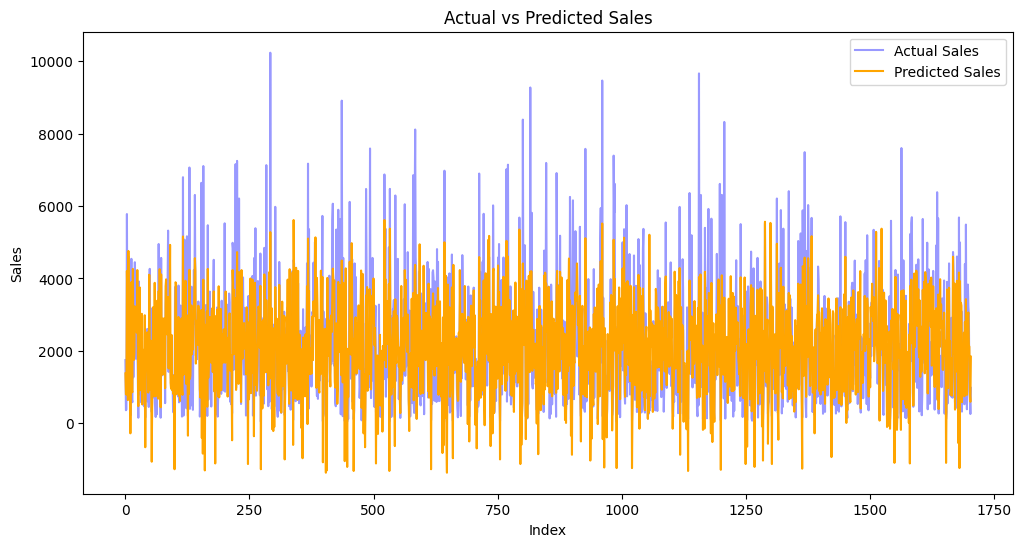

In [176]:
#graphical analysis of actual price and predicted price with different colors for actual and predicted price

indices = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(indices, y_test, color='blue', label='Actual Sales',alpha=0.4)
plt.plot(indices, y_predict_test_model2, color='orange', label='Predicted Sales')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

# 3. XGBRegressor Model

XGBRegressor Model as the 3rd highest r2 based on cross validation score according to its default hyperparameters

XGBRegressor() = 0.5035426094401404

In [177]:
# loading the XGBRegressor Model
xgb = XGBRegressor()

In [178]:
# getting the best features of XGBRegressor Model by calling the feature selection function
best_score_xgb = 0
best_features_xgb = None
for i in range(X_train_encoded_scaled.shape[1]):
    col , score = find_best_feature(i+1,xgb,X_train_encoded_scaled,y_train)
    if best_score_xgb < score:
        best_score_xgb = score
        best_features_xgb = col
print(best_features_xgb)
print(best_score_xgb)

Selected columns:  ['Outlet_Type_Grocery Store']
1 0.16753085382168947
----------------------

Selected columns:  ['Item_MRP', 'Outlet_Type_Grocery Store']
2 0.49940795945075056
----------------------

Selected columns:  ['Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Type_Grocery Store']
3 0.5235467328680714
----------------------

Selected columns:  ['Item_MRP', 'Outlet_Establishment_Year', 'Item_Type_Snack Foods', 'Outlet_Type_Grocery Store']
4 0.5184986990158912
----------------------

Selected columns:  ['Item_MRP', 'Outlet_Establishment_Year', 'Item_Type_Snack Foods', 'Outlet_Location_Type_Tier 2', 'Outlet_Type_Grocery Store']
5 0.5186641356098952
----------------------

Selected columns:  ['Item_MRP', 'Outlet_Establishment_Year', 'Item_Type_Dairy', 'Item_Type_Snack Foods', 'Outlet_Location_Type_Tier 2', 'Outlet_Type_Grocery Store']
6 0.5138890797085431
----------------------

Selected columns:  ['Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Type_Dairy', 'It

Best Features : ['Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Type_Grocery Store']

Best Score : 0.5235467328680714

In [179]:
# using a diffferent df to store
X_train_best_features_xgb = X_train_encoded_scaled[best_features_xgb]

In [180]:
# getting the cross val score of xgb with its best features
cv_score_xgb = cross_val_score(xgb, X_train_best_features_xgb, y_train, cv=5,scoring='r2')
print(cv_score_xgb)
print(cv_score_xgb.mean())

[0.52419977 0.51183843 0.53952671 0.5210218  0.52114696]
0.5235467328680714


In [181]:
# fitting the default model with its best features
xgb.fit(X_train_best_features_xgb,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [182]:
# taking only best features of xgb to test data
X_test_best_features_xgb = X_test_encoded_scaled[best_features_xgb]

In [183]:
# listing best features
best_features_xgb

['Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Type_Grocery Store']

In [184]:
# predicting the labels on test data
y_predict_xgb = xgb.predict(X_test_best_features_xgb)

In [185]:
# calcuation the mae , mse , rmse , r2
mae_xgb = mean_absolute_error(y_test, y_predict_xgb)
mse_xgb = mean_squared_error(y_test, y_predict_xgb)
rmse_xgb = root_mean_squared_error(y_test, y_predict_xgb)
r2_xgb = r2_score(y_test, y_predict_xgb)

In [186]:
print("Mean Absolute Error (MAE):", mae_xgb)
print("Mean Squared Error (MSE):",mse_xgb)
print("Root Mean Squared Error (RMSE):" ,rmse_xgb)
print("R-squared (R2):", r2_xgb)

Mean Absolute Error (MAE): 767.6915443489822
Mean Squared Error (MSE): 1261279.3269695414
Root Mean Squared Error (RMSE): 1123.0669289804332
R-squared (R2): 0.5359480435560653


# Hyperparameter Tuning : XG Boost Regressor

In [187]:
# parameters for XG Boost Classifier
params_xgb = {
    'n_estimators': [300, 350, 400],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [1,2,3,4,5],
    }

In [188]:
grid_xgb = GridSearchCV(estimator=xgb, param_grid=params_xgb, cv=5, n_jobs=-1)
grid_xgb.fit(X_train_best_features_xgb, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [300, 350, 400]})

In [189]:
# getting the best hyperparameters
print(grid_xgb.best_estimator_, grid_xgb.best_params_, grid_xgb.best_score_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 400} 0.5974544149884965


In [190]:
# testing grid_xgb model on test data
y_predict_grid_xgb = grid_xgb.predict(X_test_best_features_xgb)

In [191]:
# calcuation the mae , mse , rmse , r2
mae_grid_xgb = mean_absolute_error(y_test, y_predict_grid_xgb)
mse_grid_xgb = mean_squared_error(y_test, y_predict_grid_xgb)
rmse_grid_xgb = root_mean_squared_error(y_test, y_predict_grid_xgb)
r2_grid_xgb = r2_score(y_test, y_predict_grid_xgb)

print("Mean Absolute Error (MAE):", mae_grid_xgb)
print("Mean Squared Error (MSE):",mse_grid_xgb)
print("Root Mean Squared Error (RMSE):" ,rmse_grid_xgb)
print("R-squared (R2):", r2_grid_xgb)

Mean Absolute Error (MAE): 716.8651745813454
Mean Squared Error (MSE): 1048620.2792886868
Root Mean Squared Error (RMSE): 1024.0216205181837
R-squared (R2): 0.6141899087969025


Best Parameters : {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 400}

# Final Model : XG Boost Regressor

In [192]:
# loading the model with best hyper parameter
model3 = XGBRegressor(learning_rate= 0.01, max_depth= 4, n_estimators= 400)

In [193]:
# fitting the training data with best features of xgb
model3.fit(X_train_best_features_xgb,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Model Evaluation : XG Boost Regressor

In [194]:
# predicting the train data
y_predict_train_model3 = model3.predict(X_train_best_features_xgb)

In [195]:
# calcuation the mae , mse , rmse , r2
mae_train_model3 = mean_absolute_error(y_train, y_predict_train_model3)
mse_train_model3 = mean_squared_error(y_train, y_predict_train_model3)
rmse_train_model3 = root_mean_squared_error(y_train, y_predict_train_model3)
r2_train_model3 = r2_score(y_train, y_predict_train_model3)

In [196]:
print("Model3 on Training Data:")
print("Mean Absolute Error (MAE):", mae_train_model3)
print("Mean Squared Error (MSE):",mse_train_model3)
print("Root Mean Squared Error (RMSE):" ,rmse_train_model3)
print("R-squared (R2):", r2_train_model3)

Model3 on Training Data:
Mean Absolute Error (MAE): 753.7023567145224
Mean Squared Error (MSE): 1150401.525188786
Root Mean Squared Error (RMSE): 1072.567725222415
R-squared (R2): 0.6110946625488338


In [197]:
# predicting the test data
y_predict_test_model3 = model3.predict(X_test_best_features_xgb)

In [198]:
# calcuation the mae , mse , rmse , r2
mae_test_model3 = mean_absolute_error(y_test, y_predict_test_model3)
mse_test_model3 = mean_squared_error(y_test, y_predict_test_model3)
rmse_test_model3 = root_mean_squared_error(y_test, y_predict_test_model3)
r2_test_model3 = r2_score(y_test, y_predict_test_model3)

In [199]:
print("Model3 on Test Data:")
print("Mean Absolute Error (MAE):", mae_test_model3)
print("Mean Squared Error (MSE):",mse_test_model3)
print("Root Mean Squared Error (RMSE):" ,rmse_test_model3)
print("R-squared (R2):", r2_test_model3)

Model3 on Test Data:
Mean Absolute Error (MAE): 716.8651745813454
Mean Squared Error (MSE): 1048620.2792886868
Root Mean Squared Error (RMSE): 1024.0216205181837
R-squared (R2): 0.6141899087969025


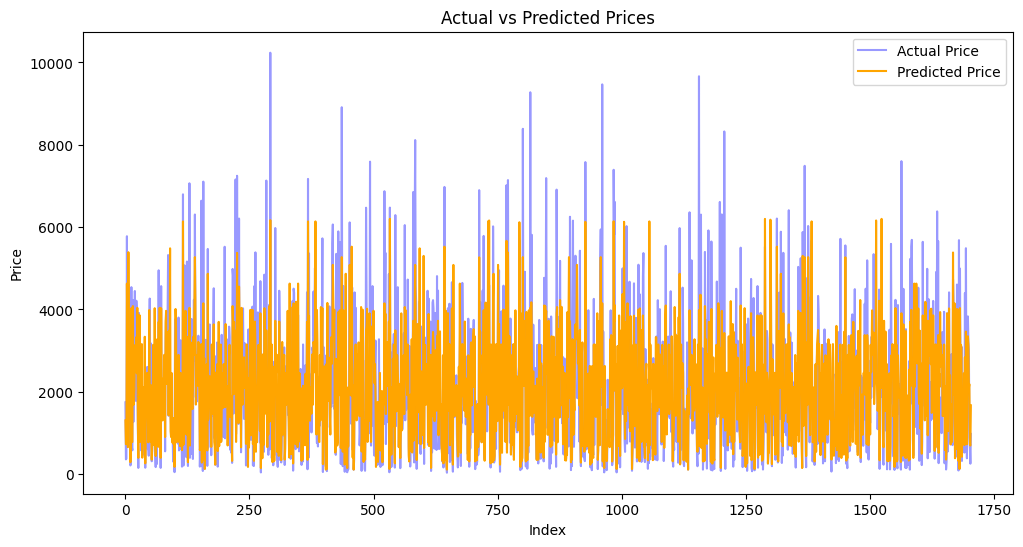

In [200]:
#graphical analysis of actual price and predicted price with different colors for actual and predicted price

indices = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(indices, y_test, color='blue', label='Actual Price',alpha=0.4)
plt.plot(indices, y_predict_test_model3, color='orange', label='Predicted Price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

# Conclusion


Model 1 : Lasso Model

Training Data R2 value : 0.55776

Testing Data R2 value : 0.57886

Model 2 : Linear Regression Model

Training Data R2 value : 0.55764

Testing Data R2 value : 0.57842

Model 3 : XG Boost Regressor

Training Data R2 value : 0.61109

Testing Data R2 value : 0.61418

# Predictive System

Buliding a Predictive System for here

In [ ]:
all_columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [203]:
#taking input data  actual = 3185.853
input_data = (19.75,'Low Fat',0.034027909,'Snack Foods',212.0902,2009,'Tier 3','Supermarket Type2')

#loading columns
columns = all_columns

# Convert the tuple to a DataFrame
df = pd.DataFrame([input_data], columns=columns)

# Encode the categorical columns
input_data_encoded = encoder.transform(df[cat_cols])

# Create a DataFrame with the encoded features
input_data_encoded_df = pd.DataFrame(input_data_encoded, columns=encoded_columns)

# Add the remaining non-categorical columns
input_data_final_encoded = pd.concat([df.drop(cat_cols, axis=1).reset_index(drop=True), input_data_encoded_df], axis=1)

# Standardize the input data
input_data_scaled = scaler.transform(input_data_final_encoded)

# Create a DataFrame with the standardized features
input_data_df = pd.DataFrame(input_data_scaled, columns=training_columns)

#loading best features
df_best_features_ls = input_data_df[best_features_ls]
df_best_features_lr = input_data_df[best_features_lr]
df_best_features_xgb = input_data_df[best_features_xgb]

#predictions
prediction1 = model1.predict(df_best_features_ls)
prediction2 = model2.predict(df_best_features_lr)
prediction3 = model3.predict(df_best_features_xgb)

# Print the predictions
print(prediction1)

print(prediction2)

print(prediction3)


[3106.45255958]
[3112.25607428]
[3091.1326]


Building the Predictive System to export

In [206]:
import json
import pickle
with open('columns.pkl', 'wb') as file:
    pickle.dump(all_columns, file)
with open('cat_columns.pkl', 'wb') as file:
    pickle.dump(cat_cols, file)
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)
with open('encoded_columns.pkl', 'wb') as file:
    pickle.dump(encoded_columns, file)
with open('training_columns.pkl', 'wb') as file:
    pickle.dump(training_columns, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('best_features_ls.json', 'w') as file:
    json.dump(best_features_ls, file)
with open('best_features_lr.json', 'w') as file:
    json.dump(best_features_lr, file)
with open('best_features_xgb.json', 'w') as file:
    json.dump(best_features_xgb, file)
with open('big_mart_sales_trained_ls_model.sav', 'wb') as f:
    pickle.dump(model1, f)
with open('big_mart_sales_trained_lr_model.sav', 'wb') as f:
    pickle.dump(model2, f)
with open('big_mart_sales_trained_xgb_model.sav', 'wb') as f:
    pickle.dump(model3, f)

In [207]:
#loading. the saved model
with open('columns.pkl', 'rb') as f:
    all_columns_sm = pickle.load(f)
with open('cat_columns.pkl', 'rb') as f:
    cat_columns_sm = pickle.load(f)
with open('encoder.pkl', 'rb') as f:
    encoder_sm = pickle.load(f)
with open('encoded_columns.pkl', 'rb') as f:
    encoded_columns_sm = pickle.load(f)
with open('training_columns.pkl', 'rb') as f:
    training_columns_sm = pickle.load(f)
with open('scaler.pkl', 'rb') as f:
    scaler_sm = pickle.load(f)
with open('best_features_ls.json', 'r') as file:
    best_features_ls = json.load(file)
with open('best_features_lr.json', 'r') as file:
    best_features_lr = json.load(file)
with open('best_features_xgb.json', 'r') as file:
    best_features_xgb = json.load(file)
with open('big_mart_sales_trained_ls_model.sav', 'rb') as f:
    loaded_model_ls = pickle.load(f)
with open('big_mart_sales_trained_lr_model.sav', 'rb') as f:
    loaded_model_lr = pickle.load(f)
with open('big_mart_sales_trained_xgb_model.sav', 'rb') as f:
    loaded_model_xgb = pickle.load(f)

In [209]:
#taking input data actual = 3248.4382
input_data = (18.85,'Low Fat',0.052044976,'Health and Hygiene',192.1846,2004,'Tier 2','Supermarket Type1')

#loading columns
columns = all_columns_sm

# Convert the tuple to a DataFrame
df = pd.DataFrame([input_data], columns=columns)

# Encode the categorical columns
input_data_encoded = encoder_sm.transform(df[cat_columns_sm])

# Create a DataFrame with the encoded features
input_data_encoded_df = pd.DataFrame(input_data_encoded, columns=encoded_columns_sm)

# Add the remaining non-categorical columns
input_data_final_encoded = pd.concat([df.drop(cat_columns_sm, axis=1).reset_index(drop=True), input_data_encoded_df], axis=1)

# Standardize the input data
input_data_scaled = scaler_sm.transform(input_data_final_encoded)

# Create a DataFrame with the standardized features
input_data_df = pd.DataFrame(input_data_scaled, columns=training_columns_sm)

#loading best features
df_best_features_ls = input_data_df[best_features_ls]
df_best_features_lr = input_data_df[best_features_lr]
df_best_features_xgb = input_data_df[best_features_xgb]

#predictions
prediction1 = loaded_model_ls.predict(df_best_features_ls)
prediction2 = loaded_model_lr.predict(df_best_features_lr)
prediction3 = loaded_model_xgb.predict(df_best_features_xgb)

# Print the predictions
print(prediction1)

print(prediction2)

print(prediction3)


[3127.87806609]
[3136.25607428]
[3158.4834]
